<a href="https://colab.research.google.com/github/HyunMin-Ju/IIP/blob/main/230611_%EC%A3%BC%ED%98%84%EB%AF%BC_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test for LV1
- 간단한 XOR Table을 학습하는 NN 을 구성하는 문제입니다.
- 2-Layer의 model을 Back propagation을 이용하여 학습시킵니다.
- 주어진 양식을 활용해 주셔도 좋고, 테스크에 맞게 코드를 작성하셔도 무방합니다.
- scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 상관 없습니다.
- Layer의 Activation 함수 Sigmoid는 주어진 함수를 사용하시면 됩니다.

## Problem Setting
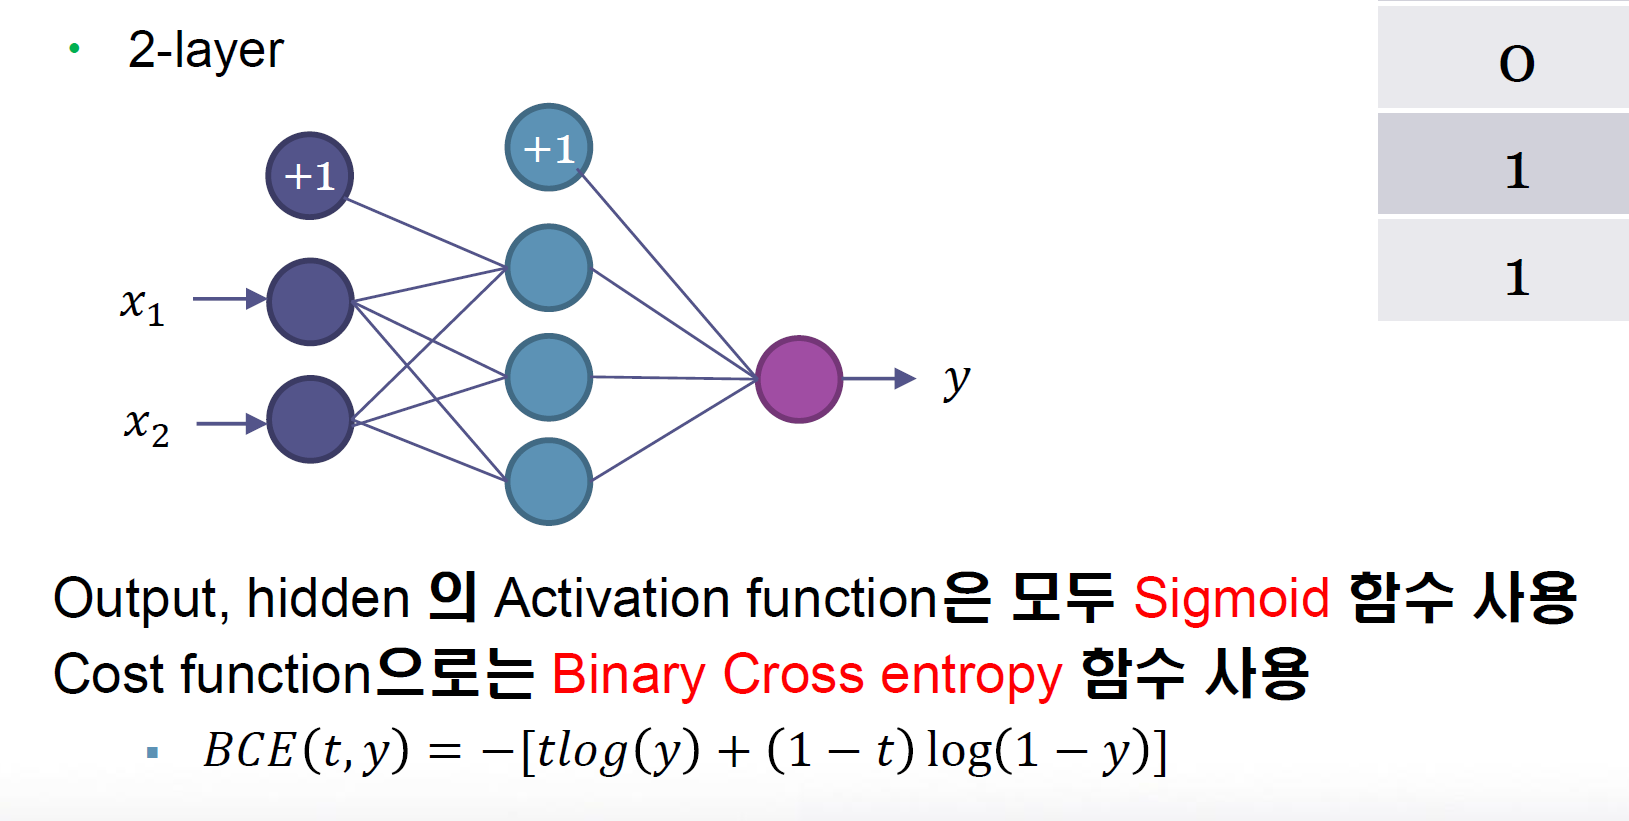

## Restriction
python으로 코드를 작성하는 경우, 양식에서 활용하는 라이브러리 외에 추가로 import 하여 사용하실 수 없습니다.

In [ ]:
## 이 외에 추가 라이브러리 사용 금지
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# Hyper parameters
# 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
# 다른 값을 사용하여도 무방합니다.
epochs = 10000
learning_rate = 0.05

In [ ]:
# Input data setting
# XOR data
# 입력 데이터들, XOR Table 에 맞게 정의되어 있습니다.
train_inp = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
train_out = np.array([0, 1, 1, 0])



# Weight Setting
# 학습에 사용되는 Weigth 들의 초기값을 선언해 줍니다. 다른 값을 사용하여도 무방합니다.
W1 = np.random.randn(2,3)
W2 = np.random.randn(3,1)
b1 = np.random.randn(1,3)
b2 = np.random.randn(1,1)

epoch[0/10000] loss: 0.0226
epoch[500/10000] loss: 0.0222
epoch[1000/10000] loss: 0.0227
epoch[1500/10000] loss: 0.0225
epoch[2000/10000] loss: 0.0181
epoch[2500/10000] loss: 0.0199
epoch[3000/10000] loss: 0.0181
epoch[3500/10000] loss: 0.0087
epoch[4000/10000] loss: 0.0145
epoch[4500/10000] loss: 0.0126
epoch[5000/10000] loss: 0.0133
epoch[5500/10000] loss: 0.0055
epoch[6000/10000] loss: 0.0050
epoch[6500/10000] loss: 0.0097
epoch[7000/10000] loss: 0.0091
epoch[7500/10000] loss: 0.0091
epoch[8000/10000] loss: 0.0086
epoch[8500/10000] loss: 0.0030
epoch[9000/10000] loss: 0.0078
epoch[9500/10000] loss: 0.0043


Text(0, 0.5, 'loss')

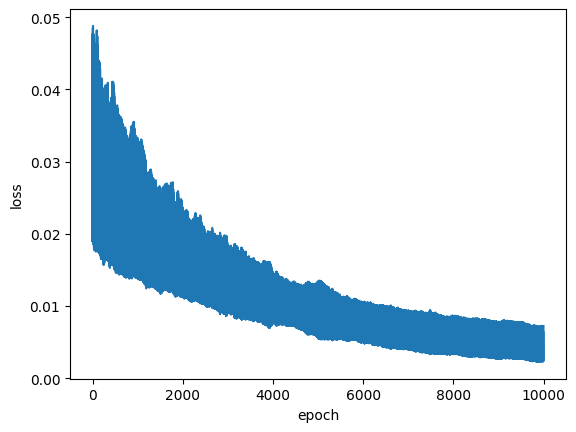

In [ ]:
##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def sigmoid(x):
    return 1 / (np.exp(-x)+1)



# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #
# 학습이 시작됩니다.
# epoch 사이즈만큼 for 문을 통해 학습됩니다.
# 빈 칸을 채워 Weight과 bias를 학습하는 신경망을 설계하세요.
# 양식의 모든 내용을 무조건 따를 필요는 없습니다. 각자에게 편하게 수정하셔도 좋습니다.

errors = []
for epoch in range(epochs):

    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]


        # Layer에 맞는 Forward Network 구성
        # HINT: 1-layer의 경우 x1만, 2-layer의 경우 x2까지 사용하시면 됩니다.
        x1 = sigmoid(np.dot(xin,W1)+b1)
        x2 = sigmoid(np.dot(x1,W2)+b2)


        # Binary Corss Entropy(BCE)로 loss 계산
        loss = -(ans*np.log10(x2) + (1-ans)*np.log10(1-x2))

        delta_loss = -(ans*(1/x2)*(1/np.log(10)) + (1-ans)* (1/(x2-1))*(1/np.log(10)))

        # Weight 초기값을 설정(다른 방법으로 이용하셔도 됩니다.)
        delta_W1 = np.zeros((2,3))
        delta_W2 = np.zeros((3,1))
        delta_b1 = np.zeros((1,3))
        delta_b2 = np.zeros((1,1))


        # Back propagation을 통한 Weight의 Gradient update step
        delta_b2 = delta_loss*x2*(1.0-x2)
        delta_W2 = delta_b2 * x1.T
        delta_b1 = delta_b2*W2.T*x1*(1.0-x1)
        delta_W1 = delta_b1*xin.T


        # 각 weight의 update 반영
        W1 = W1 -learning_rate * delta_W1
        W2 = W2 - learning_rate * delta_W2

        b1 = b1 - learning_rate * delta_b1
        b2 = b2 - learning_rate * delta_b2


        ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
       print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))


    errors.append(loss)



## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:

#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx]
    ans = train_out[idx]

    x1 = sigmoid(np.matmul(xin,W1)+b1)
    x2 = sigmoid(np.matmul(x1,W2)+b2)

    pred = x2

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

input:  [1 1] , answer:  0 , pred: 0.0148
input:  [1 0] , answer:  1 , pred: 0.9835
input:  [0 1] , answer:  1 , pred: 0.9946
input:  [0 0] , answer:  0 , pred: 0.0097
